In [1]:
# Jack's Car Rental
import numpy as np
from matplotlib import pyplot as plt 
from scipy.stats import poisson

MAX_UPBOUND = 11
LAMB1 = 3
LAMB2 = 3
LAMB3 = 4
LAMB4 = 2

poisson_cache = dict()


def poisson_probability(lam,n):
    global poisson_cache
    key = n * 10 + lam
    if key not in poisson_cache:
        poisson_cache[key] = poisson.pmf(n, lam)
    return poisson_cache[key]





class CarRental:
    def __init__(self, part_cost = False):
        self.all_states = [(i,j) for i in range(21) for j in range(21)]
        self.all_actions =[(-i,i) for i in range(-5,6)]
        self.policy = [ [(0,0) for j in range(21)] for i in range(21)]
        self.value = np.zeros((21,21))
        self.discount_rate = 0.9
        self.part_cost = part_cost
    
    def get_dynamic_reward(self, s, a):
    
        num_cars1 = min(s[0]+a[0],20)
        num_cars2 = min(s[1]+a[1],20)
        returns = -2*abs(a[0])
        if self.part_cost and a[0]<=-1:
            returns += 2
        
        for req1 in range(MAX_UPBOUND):
            for req2 in range(MAX_UPBOUND):
                p_req1 = poisson_probability(LAMB1, req1)
                p_req2 = poisson_probability(LAMB3, req2)
                prob = p_req1*p_req2
                satisfy_req1 = min(num_cars1, req1)
                satisfy_req2 = min(num_cars2, req2)
                reward = 10*(satisfy_req1+satisfy_req2)
                if self.part_cost:
                    if num_cars1 >= 10:
                        reward += -4
                    if num_cars2 >= 10:
                        reward += -4
                for ret1 in range(MAX_UPBOUND):
                    for ret2 in range(MAX_UPBOUND):
                        p_ret1 = poisson_probability(LAMB2, ret1)
                        p_ret2 = poisson_probability(LAMB4, ret2)
                        prob_ = prob*p_ret1*p_ret2
                        n_cars1 = min(num_cars1 - req1  + ret1, 20)
                        n_cars2 = min(num_cars2 - req2  + ret2, 20)
                        returns += prob_*(reward+ self.discount_rate*self.value[n_cars1,n_cars2])
        return returns




    def policy_evaluation(self):
        # Policy Evaluation
        v_new = np.zeros((21,21))
        while True:
            delta = 0
            for s in self.all_states:
                v = v_new[s]
                a = self.policy[s[0]][s[1]]
                v_new[s] = self.get_dynamic_reward(s,a) 
                delta = max(delta, abs(v-v_new[s]))
            self.value = v_new
            print('Evaluation delta:', delta)
            if delta < 0.001:
                return

    def policy_iteration(self):
        
        while True:
            self.policy_evaluation()
            # Policy improvement
            stable = True
            for s in self.all_states:
                old_action = self.policy[s[0]][s[1]]
                v_max = 0
                v = 0
                for a in self.all_actions:
                    if  s[0]+a[0] >=0 and s[1]+a[1] >=0:
                        v = self.get_dynamic_reward(s,a)
                    else:
                        v = -np.inf
                    if v > v_max:
                        v_max = v
                        self.policy[s[0]][s[1]] = a

                if self.policy[s[0]][s[1]] != old_action:
                        stable = False
            print('Policy improvement.')
            if stable:
                return

    
    



Bad key "text.kerning_factor" on line 4 in
/root/Anacondas/anaconda3/envs/python37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
agt = CarRental()
agt.policy_iteration()

Evaluation delta: 69.5240300198269
Evaluation delta: 170.7438508264151
Evaluation delta: 117.78453984406266
Evaluation delta: 85.08955634674757
Evaluation delta: 69.84007977372255
Evaluation delta: 55.237045762714104
Evaluation delta: 43.26411736304948
Evaluation delta: 33.942215795964614
Evaluation delta: 26.8238707788106
Evaluation delta: 21.26563134793213
Evaluation delta: 16.84018472257401
Evaluation delta: 13.329724778436685
Evaluation delta: 10.603491969470497
Evaluation delta: 8.433786579791558
Evaluation delta: 6.698063820634729
Evaluation delta: 5.312896779427547
Evaluation delta: 4.20984345559657
Evaluation delta: 3.3330916254716385
Evaluation delta: 2.637283518085269
Evaluation delta: 2.0857312829220973
Evaluation delta: 1.64891988169677
Evaluation delta: 1.3032160593661501
Evaluation delta: 1.0297618624576899
Evaluation delta: 0.8135467086175368
Evaluation delta: 0.6426440654114458
Evaluation delta: 0.5075911042679309
Evaluation delta: 0.4008880819319529
Evaluation delta: 0

In [3]:
policy = [[agt.policy[i][j][1] for j in range(21)] for i in range(21)]
graph = np.array(policy,dtype=int)
print(graph)

[[ 0  0 -2 -2 -3 -3 -4 -4 -4 -4 -4 -4 -4 -4 -4 -5 -5 -5 -5 -5 -5]
 [ 0 -1 -1 -2 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -4 -4 -4 -4 -4 -4 -4]
 [ 0  0 -1 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -3 -3 -3 -3 -3 -3 -3 -3]
 [ 0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  3  2

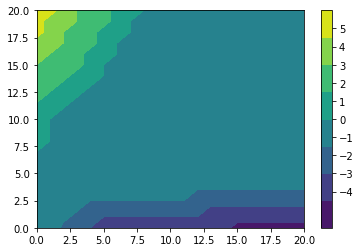

In [4]:
plt.contourf(range(21),range(21),graph)
plt.colorbar(ticks=[-4,-3,-2,-1,0,1,2,3,4,5])

In [2]:
agt = CarRental(part_cost=True)
agt.policy_iteration()

Evaluation delta: 69.46306055507125
Evaluation delta: 152.5634478383754
Evaluation delta: 106.14241880318323
Evaluation delta: 77.39093705531158
Evaluation delta: 64.08877063772871
Evaluation delta: 50.74191908129853
Evaluation delta: 39.74939470846812
Evaluation delta: 31.178268866277392
Evaluation delta: 24.614256339482722
Evaluation delta: 19.504819018244802
Evaluation delta: 15.441577809303169
Evaluation delta: 12.220540117222868
Evaluation delta: 9.730962100016484
Evaluation delta: 7.7361206365213775
Evaluation delta: 6.1417198385932465
Evaluation delta: 4.870244188280651
Evaluation delta: 3.858276992495405
Evaluation delta: 3.054249257960578
Evaluation delta: 2.416350337245376
Evaluation delta: 1.9108190822162214
Evaluation delta: 1.5105268054662702
Evaluation delta: 1.193769228391261
Evaluation delta: 0.9432385776227648
Evaluation delta: 0.7451649770150652
Evaluation delta: 0.5886118688060833
Evaluation delta: 0.4649044374514233
Evaluation delta: 0.36716901137549485
Evaluation d

In [3]:
policy = [[agt.policy[i][j][1] for j in range(21)] for i in range(21)]
graph = np.array(policy,dtype=int)
print(graph)

[[ 0 -1 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4 -4 -4 -5 -5 -5 -5 -5 -5 -5]
 [ 0 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3 -3 -4 -5 -4 -4 -4 -4 -4 -4]
 [ 0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2 -3 -4 -5 -3 -3 -3 -3 -3 -3]
 [ 0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -3 -4 -5 -2 -2 -2 -2 -2 -2]
 [ 0  0  0  0  0  0  0  0  0  0 -1 -2 -3 -4 -1 -1 -1 -1 -1 -1 -1]
 [ 1  0  0  0  0  0  0  0  0  0 -1 -2 -3  0  0  0  0  0  0  0 -1]
 [ 1  1  1  1  0  0  0  0  0  0 -1 -2  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  0  0  0 -1 -2  0  0  0  0  0  0  0  0  0]
 [ 2  1  1  1  1  1  1  1  0  0 -1  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 3  3  2  2  2  2  2  2  1  0  2  2  2  2  2  2  2  2  2  2  2]
 [ 4  3  3  3  3  3  3  1  1  0 -1  3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  1  1  1  0 -1  1  1  1  1  1  1  1  1  1  1]
 [ 5  5  5  5  5  2  1  1  1  0 -1  1  1  1  1  1  1  1  1  1  1]
 [ 5  5  4

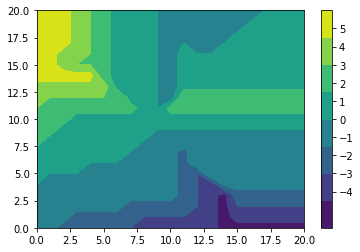

In [4]:
plt.contourf(range(21),range(21),graph)
plt.colorbar(ticks=[-4,-3,-2,-1,0,1,2,3,4,5])
